In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [166]:
#Reading the Cleaned Algerian Forest fire Dataset
df = pd.read_csv(r"D:\Programming\Study\Machine Learning\Datasets\Algerian_forest_fires_dataset_Cleaned.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [167]:
##Droping Month,Day,and Year as they are not required for training the model
df.drop(['day','month','year'],axis = 1,inplace= True) 
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [168]:
##Encoding of categories in 'Classes' feature
## NOT FIRE = 0
## FIRE = 1
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [169]:
##Creating Indepenent and dependent Features
X = df.drop('FWI',axis=1)
Y = df['FWI']


In [170]:
##Train-Test-Split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

### Feature Selection Based On Correlation Value

In [171]:
#### Checking for Multicollinearity

# Multicollinearity is a statistical phenomenon in which two or more independent variables in a regression model are highly correlated,
# meaning they have a strong linear relationship. 
# This can make it difficult to determine the individual effect of each variable on the dependent variable,
#  as their influences may overlap.

# Why Does Multicollinearity Matter?

# Multicollinearity does not affect the ability of a regression model to make predictions. 
# However, it creates issues in interpreting the coefficients of the independent variables because:

# Inflated Standard Errors: When variables are highly correlated, their standard errors increase, 
# making the coefficients less reliable.

# Unstable Coefficients: Small changes in the data can lead to large changes in the estimated coefficients.

# Difficulty in Determining Importance: It becomes challenging to determine which variable is 
# truly influencing the dependent variable.



<Axes: >

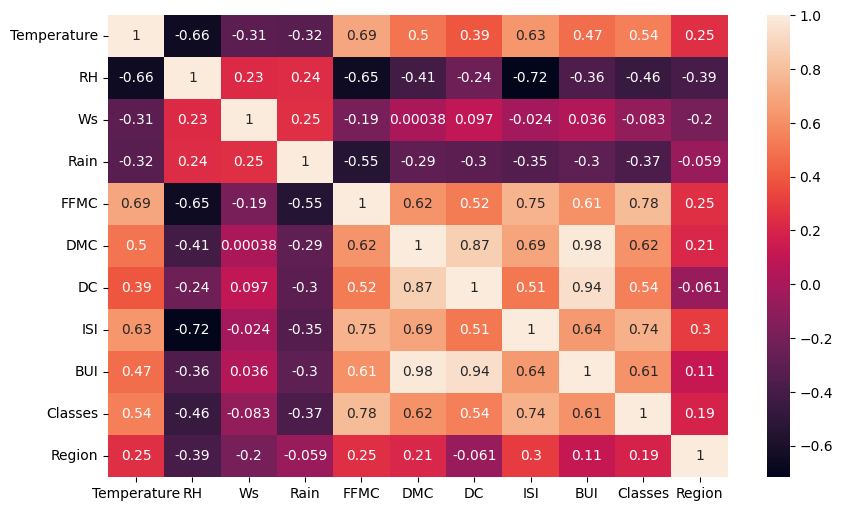

In [172]:
plt.subplots(figsize = (10,6))
sns.heatmap(X_train.corr(),annot=True)

In [173]:
##Function to return a set of all the Features having Correlation above a specific Threshold
def correlation(dataset,threshold):
    corr_columns = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                corr_columns.add(colname)
    return corr_columns

In [174]:
##Threshold - is setup by domain expert
col  =correlation(X_train,0.85)
print(col)

{'DC', 'BUI'}


In [175]:
##Droping the Highly Correlated Features
X_train.drop(col,axis=1,inplace=True)
X_test.drop(col,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

### Feature Scaling or Standardization

In [176]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

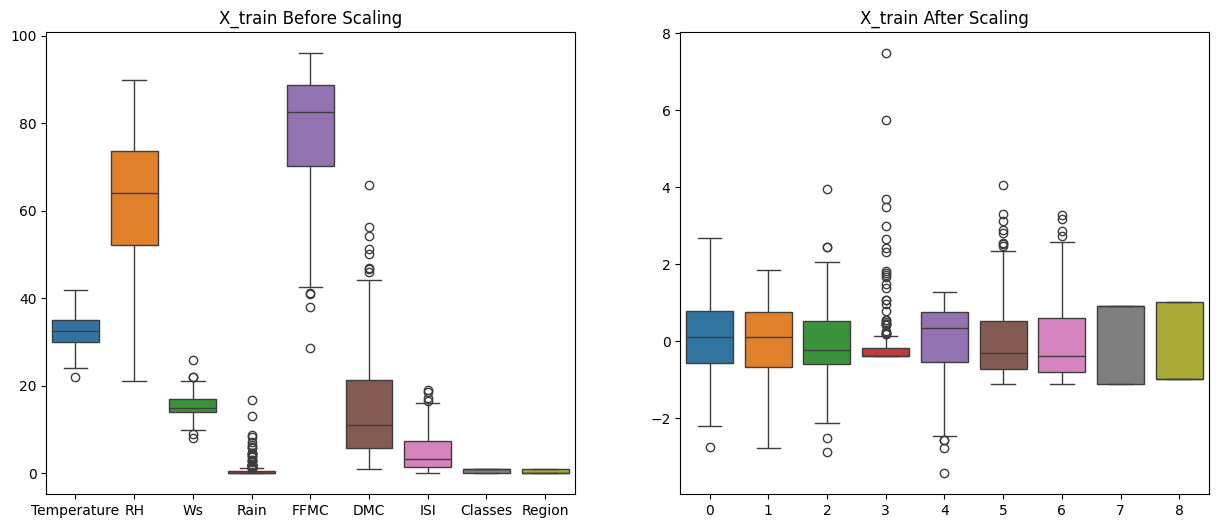

In [177]:
##Checking outliers
fig,axes = plt.subplots(1,2,figsize=(15,6))
sns.boxplot(data=X_train,ax=axes[0])
axes[0].set_title('X_train Before Scaling')
sns.boxplot(data=X_train_scaled,ax=axes[1])
axes[1].set_title('X_train After Scaling')


#### As we can see after Feature scaling or standarization all our feature have come to a common scale


# Liner Regression Model

In [178]:
Linear_Regression = LinearRegression(n_jobs=-1)
Linear_Regression.fit(X_train_scaled,Y_train)
Y_Pred = Linear_Regression.predict(X_test_scaled)
MSE = mean_squared_error(Y_test,Y_Pred)
MAE = mean_absolute_error(Y_test,Y_Pred)
R_Squared = r2_score(Y_test,Y_Pred)
print(f"MSE:{MSE}, MAE:{MAE}, R_Squared:{R_Squared}")

MSE:0.674276687379158, MAE:0.5468236465249978, R_Squared:0.9847657384266951


Text(0, 0.5, 'Predicted')

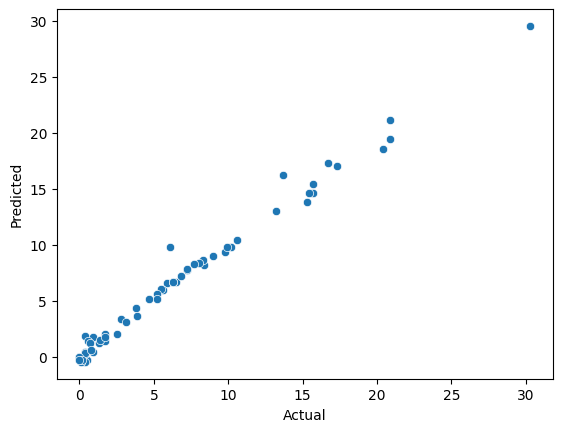

In [179]:
sns.scatterplot(x=Y_test,y=Y_Pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# Regualrization


###

### Lasso Regresion

In [180]:
from sklearn.linear_model import Lasso
Lasso_regression = Lasso()#By default Alpha(or lamda) is taking 1
Lasso_regression.fit(X_train_scaled,Y_train)
Y_Pred_Lasso = Lasso_regression.predict(X=X_test_scaled)
MSE = mean_squared_error(Y_test,Y_Pred_Lasso)
MAE = mean_absolute_error(Y_test,Y_Pred_Lasso)
R_Squared = r2_score(Y_test,Y_Pred_Lasso)
print(f"MSE:{MSE}, MAE:{MAE}, R_Squared:{R_Squared}")

MSE:2.2483458918974772, MAE:1.133175994914409, R_Squared:0.9492020263112388


<Axes: xlabel='FWI'>

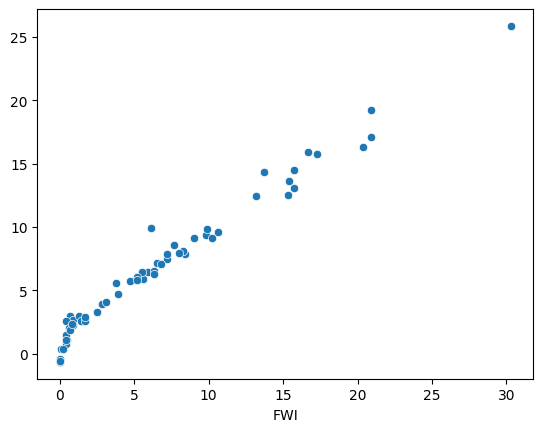

In [181]:
sns.scatterplot(x=Y_test,y=Y_Pred_Lasso)

### Ridge Regression

In [182]:
from sklearn.linear_model import Ridge
Ridge_regression = Ridge()#By default Alpha(or lamda) is taking 1
Ridge_regression.fit(X_train_scaled,Y_train)
Y_Pred_Ridge = Ridge_regression.predict(X=X_test_scaled)
MSE = mean_squared_error(Y_test,Y_Pred_Ridge)
MAE = mean_absolute_error(Y_test,Y_Pred_Ridge)
R_Squared = r2_score(Y_test,Y_Pred_Ridge)
print(f"MSE:{MSE}, MAE:{MAE}, R_Squared:{R_Squared}")

MSE:0.6949198918152096, MAE:0.5642305340105715, R_Squared:0.9842993364555512


<Axes: xlabel='FWI'>

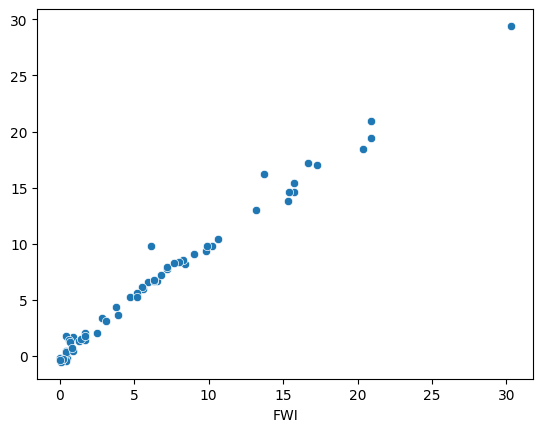

In [183]:
sns.scatterplot(x=Y_test,y=Y_Pred_Ridge)

### Elastic-Net Regression

In [184]:
from sklearn.linear_model import ElasticNet
ElasticNet_regression = ElasticNet()
ElasticNet_regression.fit(X_train_scaled,Y_train)
Y_Pred_ElasticNet = ElasticNet_regression.predict(X=X_test_scaled)
MSE = mean_squared_error(Y_test,Y_Pred_ElasticNet)
MAE = mean_absolute_error(Y_test,Y_Pred_ElasticNet)
R_Squared = r2_score(Y_test,Y_Pred_ElasticNet)
print(f"MSE:{MSE}, MAE:{MAE}, R_Squared:{R_Squared}")


MSE:5.5172511010252245, MAE:1.8822353634896005, R_Squared:0.8753460589519703


<Axes: xlabel='FWI'>

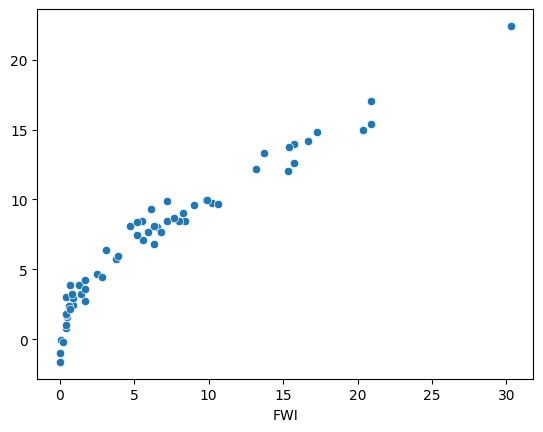

In [185]:
sns.scatterplot(x=Y_test,y=Y_Pred_ElasticNet)

# Hyperparameter Tuning(or Cross Validation)

### Selecting the the regularization parameter(@alpha or lamda) that controls the strength of the regularization applied to the model with LassoCV

In [186]:
from sklearn.linear_model import LassoCV

#The LassoCV function in scikit-learn is used for Lasso regression with built-in cross-validation to select the optimal regularization parameter (𝛼)
# Key Features of LassoCV
# 1.Cross-Validation: Automatically splits the data into training and validation sets during training.
# Tests multiple values of the regularization parameter (𝛼) to find the best one.

# 2.Automatic Tuning: Finds the optimal  𝛼 that minimizes the validation error.

# 3.Feature Selection: Shrinks less important feature coefficients to zero, effectively performing feature selection.

# Parameters
# alphas: A list of  α values to try. If not specified, it generates a default list.

# cv: Determines the cross-validation splitting strategy.
# Integer: Number of folds in K-Fold cross-validation.
# Object: Predefined cross-validator (e.g., KFold, StratifiedKFold).
# Default: 5-fold cross-validation.

# max_iter: Maximum number of iterations for the optimization algorithm. Default is 1000.In LassoCV, the max_iter parameter specifies the maximum number of iterations the underlying optimization algorithm (coordinate descent) will perform to minimize the loss function for each value of the regularization parameter (α) during the cross-validation process.

# normalize (Deprecated): If True, normalizes the features before regression.

# random_state: Controls the random number generator for reproducibility.

# n_jobs: Number of CPU cores to use. -1 uses all available cores.

# Output Explanation
# 1.alpha_: Optimal regularization parameter found through cross-validation.
# 2.coef_: Coefficients of the trained Lasso model (some may be zero if regularized).
# 3.R-squared Score: Measures how well the model fits the data.


In [187]:
Lasso_CV = LassoCV(cv = 5)
Lasso_CV.fit(X_train_scaled,Y_train)


LassoCV(cv=5)

In [188]:
print('Alpha =',Lasso_CV.alpha_)# Finally Selected Alpha value after tuning 

Alpha = 0.05725391318234408


In [189]:
#All Alpha values which are tried
Lasso_CV.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [190]:
# In LassoCV, the mse_path_ attribute provides detailed information about the performance of the model during the cross-validation process. 
# Specifically, it contains the mean squared error (MSE) calculated for each fold and for each value of the regularization parameter (α).
Lasso_CV.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

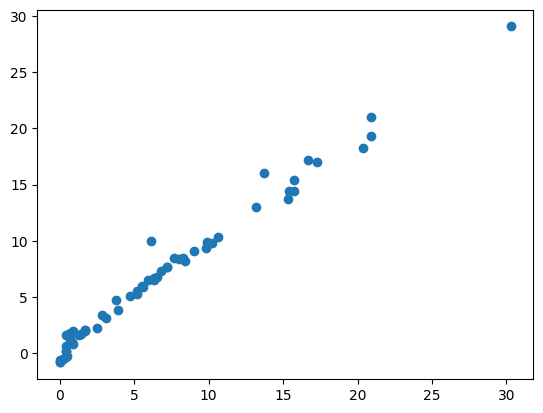

In [191]:
Y_Pred_Lasso_CV = Lasso_CV.predict(X_test_scaled)
plt.scatter(Y_test,Y_Pred_Lasso_CV)

In [192]:
MSE = mean_squared_error(Y_test,Y_Pred_Lasso_CV)
MAE = mean_absolute_error(Y_test,Y_Pred_Lasso_CV)
R_Squared = r2_score(Y_test,Y_Pred_Lasso_CV)
print(f"MSE:{MSE}, MAE:{MAE}, R_Squared:{R_Squared}")


MSE:0.792499555474362, MAE:0.619970115826343, R_Squared:0.9820946715928275


### Selecting the the regularization parameter(@alpha or lamda) that controls the strength of the regularization applied to the model with RidgeCV

In [193]:
from sklearn.linear_model import RidgeCV
Ridge_CV = RidgeCV(cv=5)
Ridge_CV.fit(X_train_scaled,Y_train)

RidgeCV(cv=5)

In [194]:
print('Alpha =',Ridge_CV.alpha_)# Finally Selected Alpha value after tuning 

Alpha = 1.0


In [198]:
#All Alpha values which are tried
Ridge_CV.alphas

(0.1, 1.0, 10.0)

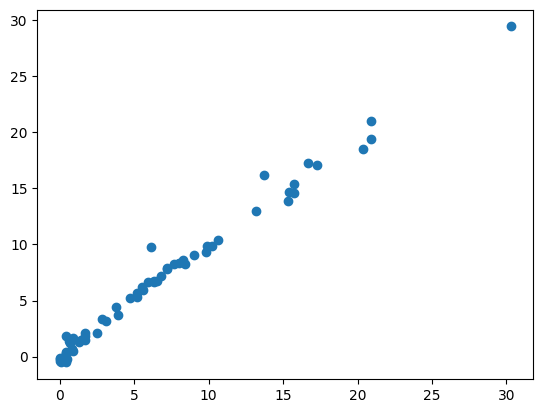

In [199]:
Y_Pred_Ridge_CV = Ridge_CV.predict(X_test_scaled)
plt.scatter(Y_test,Y_Pred_Ridge_CV)

In [200]:
MSE = mean_squared_error(Y_test,Y_Pred_Ridge_CV)
MAE = mean_absolute_error(Y_test,Y_Pred_Ridge_CV)
R_Squared = r2_score(Y_test,Y_Pred_Ridge_CV)
print(f"MSE:{MSE}, MAE:{MAE}, R_Squared:{R_Squared}")

MSE:0.6949198918152096, MAE:0.5642305340105715, R_Squared:0.9842993364555512
